In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

/Users/fatihozkan/Desktop/pythonDataAnalysisProject/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
df.sample(10, random_state=42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,NaN,NaN,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,NaN,NaN,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,NaN,NaN,Morgan King,None,None
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,NaN,NaN,Konnekt,['jira'],{'async': ['jira']}
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,NaN,NaN,Independent Recruiters,['python'],{'programming': ['python']}
183426,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-11-09 16:07:57,False,False,Singapore,None,NaN,NaN,FLEXOSENSE PTE. LTD.,"['r', 'python', 'java', 'sql', 'sql server', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
287790,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-07-14 17:02:23,True,False,United States,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
541983,Data Analyst,"Data Analyst, Cloud Systems Jobs","Chantilly, VA",via Clearance Jobs,Full-time,False,Georgia,2023-06-15 19:44:34,False,False,United States,None,NaN,NaN,SAIC,"['sql', 'r', 'matlab', 'python', 'oracle', 'aw...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
416896,Data Scientist,Alternant Actuariat & Data Science H/F,France,via LinkedIn,Full-time,False,France,2023-09-22 16:47:24,False,False,France,None,NaN,NaN,KPMG France,None,None
780907,Data Engineer,"Data Engineer with Fivetran,Qlik Must","Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-16 06:19:09,False,False,Mexico,None,NaN,NaN,CORUS Consulting,"['oracle', 'snowflake', 'aws', 'azure', 'alter...","{'analyst_tools': ['alteryx'], 'cloud': ['orac..."


In [5]:
df.pivot_table(index = "job_title_short", aggfunc="size")

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [8]:
df.groupby("job_title_short").size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [9]:
df.pivot_table(values = "salary_year_avg", index = "job_title_short", aggfunc="median")

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [10]:
df.groupby("job_title_short")[["salary_year_avg"]].median()

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [13]:
df.pivot_table(values = "salary_year_avg", index = "job_title_short", columns ="job_country" ,aggfunc="median").T

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


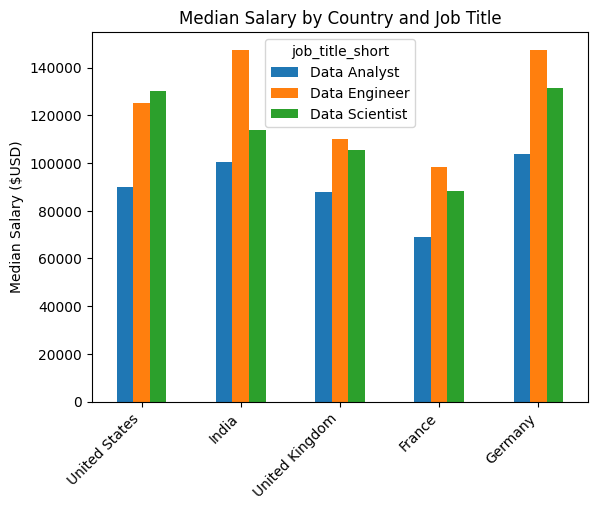

In [24]:
top_countries = df["job_country"].value_counts().head(5).index

df_job_country_salary= df.pivot_table(
    values= "salary_year_avg",
    index= "job_country",
    columns="job_title_short",
    aggfunc="median"
)
df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ["Data Analyst","Data Engineer","Data Scientist"]

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind="bar")
plt.ylabel("Median Salary ($USD)")
plt.xlabel("")
plt.title("Median Salary by Country and Job Title")
plt.xticks(rotation = 45, ha="right")
plt.show()

Index Management

In [5]:
df.index.name = "job_index"
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [6]:
df.index.dtype

dtype('int64')

In [8]:
df_usa = df[df["job_country"] == "United States"]
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [14]:
df_usa.reset_index(inplace = True)
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [15]:
df_usa.set_index("job_index", inplace =True)
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [17]:
median_pivot = df_usa.pivot_table(
    values = "salary_year_avg",
    index = "job_title_short",
    aggfunc = ["median","min","max"]
)
median_pivot

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,35000.0,387460.0
Cloud Engineer,116100.0,42000.0,221844.0
Data Analyst,90000.0,25000.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Data Scientist,130000.0,30000.0,960000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Analyst,110000.0,35360.0,425000.0
Senior Data Engineer,150000.0,45000.0,375000.0


In [19]:
median_pivot.sort_values(by= ("median","salary_year_avg"),ascending=False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,155000.0,55000.0,475000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Engineer,150000.0,45000.0,375000.0
Data Scientist,130000.0,30000.0,960000.0
Software Engineer,130000.0,48982.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Cloud Engineer,116100.0,42000.0,221844.0
Senior Data Analyst,110000.0,35360.0,425000.0


In [21]:
median_pivot.sort_index(inplace=True)